In [5]:
""""
USING REGRESSION ANALYSIS TO COMPUTE RESIDUALS & REMOVE A TREND

In this Notebook, I load in data that I am intersted in and then I plug
it into a function called "ResidualVsResidual". This function will take in two 
parameters and compute their residuals relative to a third parameter to reveal their
relationship to one another independent of that third parmameter. 

"""

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
""""
This cell is used to load in the data that I will be using.
The dataset contains information on patients who potentially have heart disease.
The dataset includes parameters such as the patient's age, sex, chest pain type,
resting blood pressure, etc. 

Reference:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

"""

import pandas as pd
table=pd.read_csv("heart.csv")
table

In [126]:
""""

This cell is used to create two functions. 

The first function is called, "polyfit" and is used to compute a best-fit curve 
using regression analysis. This function takes in three arguments: 1.) the x-array 
parameter 2.) the y-array parameter 3.) the desired degree for the polynomial. The
output is an array for the best-fit curve. 

The second function is called, "ResidualVsResidual". The purpose of this function
is to reveal the true relationship between two parameters after removing their
trend with a third parameter. For example, if I plot parameter 1 vs. parameter 2
and get a correlation coefficient CC that is high, it could be that this
CC is high in part due to parameter 1 being correlated with some parameter 3 and
parameter 2 also being correlated with that same parameter 3. Their dependence
on parameter 3 could be the cause for a high CC. To better reveal their relationship
to one another, we could remove their dependency on parameter 3. To do this, we
plot parameter 1 vs. parameter 3, compute a best-fit curve, and then compute
residuals for parameter 1 by taking: parameter 1 - best-fit curve. We would then repeat
this processs for parameter 2 to compute the residual for parameter 2. We could then
plot the residual of parameter 1 vs. the residual of parameter 2 and compute a CC.
This would give us their relationship after removing their dependency on parameter 3.

These are the arguments this function takes: 
1.) the x-axis parameter 
2.) the y-axis parameter 
3.) the 3rd parameter whose dependecy we want to remove; call this the trend parameter 
4.) the x-axis label 
5.) the y-axis label 
6.) the trend parameter label
7.) the desired degree of the polynomial to compute the best-fit curve 

The output is as follows:

1.) A plot of the y-axis parameter vs. the x-axis parameter with the CC in the corner.
2.) A plot of the x-axis parameter vs. the trend parameter with the best-fit
curve and then the CC in the corner.
3.) A plot of the y-axis parameter vs. the trend parameter with the best-fit
curve and then the CC in the corner.
4.) A plot of the residual of the y-axis parameter ΔY vs. the residual of the
x-axis parameter ΔX with the CC in the corner. 

"""

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

def polyfit(xarr,yarr,poly):
    z=np.polyfit(xarr,yarr,poly)
    y=[]
    for i in range(poly+1):
        y.append(z[i]*(xarr**(poly-i)))
    y=np.asarray(y)
    return (y.sum(axis=0))
    


def ResidualVsResidual(xparameter,yparameter,trendparameter,xlabel,ylabel,trendlabel,p):
    
    #Making the Y vs. X plot
    plt.figure (figsize = (20, 10))
    labelsize = 15
    ticksize = 20
    plt.xticks(size = ticksize)
    plt.yticks(size = ticksize)

    plt.scatter(xparameter,yparameter,color="red",alpha=0.1,s=350,edgecolor='black')

    plt.xlabel(xlabel,size=20)
    plt.ylabel(ylabel,size=20)
    plt.title("Y vs. X",size=20)

    cc=np.corrcoef(xparameter,yparameter)[0][1]
    lss = [None]
    lw= [0]
    lines = [Line2D([0], [0], color='black', linewidth=lw[l], linestyle=lss[l]) for l in range(len(lss))]
    labels = [" ".join(["CC=",str(round(cc,3))])]
    plt.legend(lines,labels,fontsize=25)
    plt.grid("True")

    #Making the X vs. Trend plot
    
    xfit = polyfit(trendparameter,xparameter,p)

    plt.figure (figsize = (20, 10))
    labelsize = 15
    ticksize = 20
    plt.xticks(size = ticksize)
    plt.yticks(size = ticksize)

    plt.scatter(trendparameter,xparameter,color="red",alpha=0.1,s=350,edgecolor='black')
    plt.plot(trendparameter,xfit,color='black')

    plt.xlabel(trendlabel,size=20)
    plt.ylabel(xlabel,size=20)
    plt.title("X vs. Trend",size=20)

    cc=np.corrcoef(trendparameter,xparameter)[0][1]
    lss = [None]
    lw= [0]
    lines = [Line2D([0], [0], color='black', linewidth=lw[l], linestyle=lss[l]) for l in range(len(lss))]
    labels = [" ".join(["CC=",str(round(cc,3))])]
    plt.legend(lines,labels,fontsize=25)
    plt.grid("True")


    xresidual= xparameter - xfit

    #Making the Y vs. Trend plot
    
    yfit=polyfit(trendparameter,yparameter,p)

    plt.figure (figsize = (20, 10))
    labelsize = 15
    ticksize = 20
    plt.xticks(size = ticksize)
    plt.yticks(size = ticksize)

    plt.scatter(trendparameter,yparameter,color="red",alpha=0.1,s=350,edgecolor='black')
    plt.plot(trendparameter,yfit,color='black')

    plt.xlabel(trendlabel,size=20)
    plt.ylabel(ylabel,size=20)
    plt.title("Y vs. Trend",size=20)

    cc=np.corrcoef(trendparameter,yparameter)[0][1]
    lss = [None]
    lw= [0]
    lines = [Line2D([0], [0], color='black', linewidth=lw[l], linestyle=lss[l]) for l in range(len(lss))]
    labels = [" ".join(["CC=",str(round(cc,3))])]
    plt.legend(lines,labels,fontsize=25)
    plt.grid("True")

    yresidual= yparameter - yfit

    #Making the ΔY vs. ΔX plot

    plt.figure (figsize = (20, 10))
    labelsize = 15
    ticksize = 20
    plt.xticks(size = ticksize)
    plt.yticks(size = ticksize)

    plt.scatter(xresidual,yresidual,color="red",alpha=0.1,s=350,edgecolor='black')


    plt.xlabel(" ".join([r"$\Delta$",xlabel]),size=20)
    plt.ylabel(" ".join([r"$\Delta$",ylabel]),size=20)
    plt.title(r"$\Delta$ Y vs. $\Delta$ X",size=20)

    cc=np.corrcoef(xresidual,yresidual)[0][1]
    lss = [None]
    lw= [0]
    lines = [Line2D([0], [0], color='black', linewidth=lw[l], linestyle=lss[l]) for l in range(len(lss))]
    labels = [" ".join(["CC=",str(round(cc,3))])]
    plt.legend(lines,labels,fontsize=25)
    plt.grid("True")



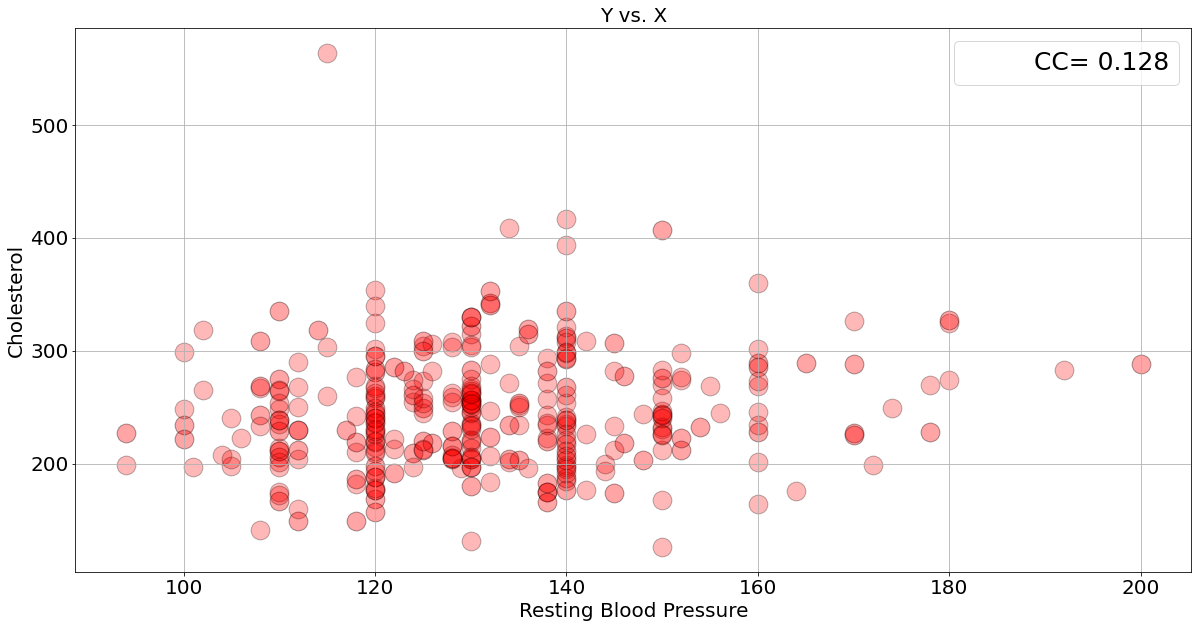

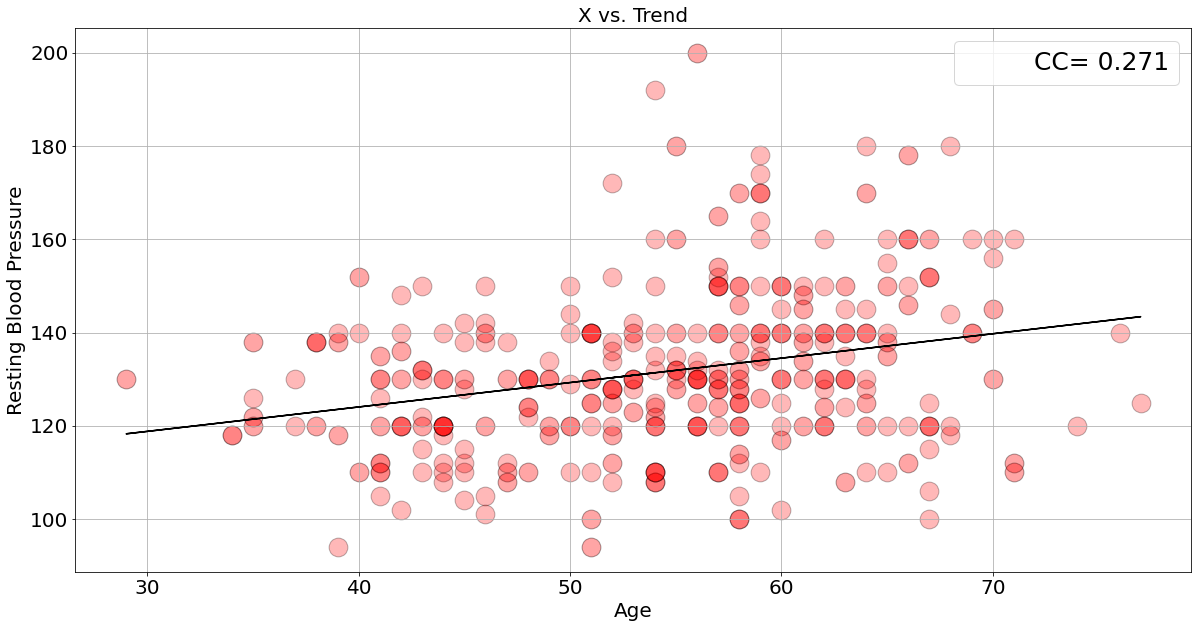

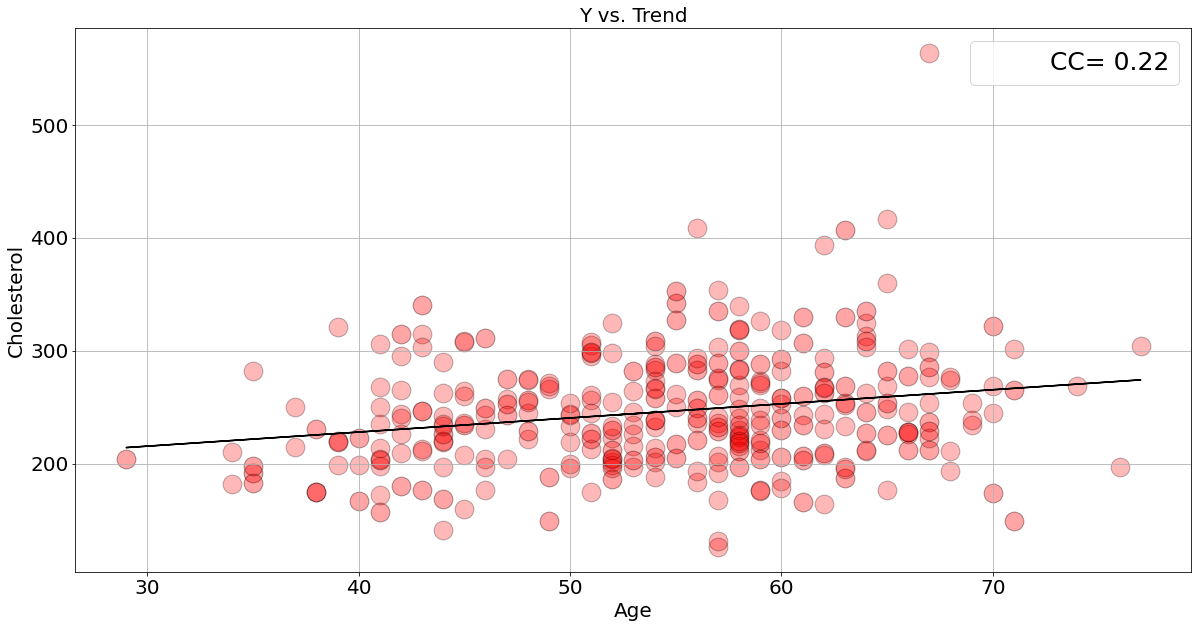

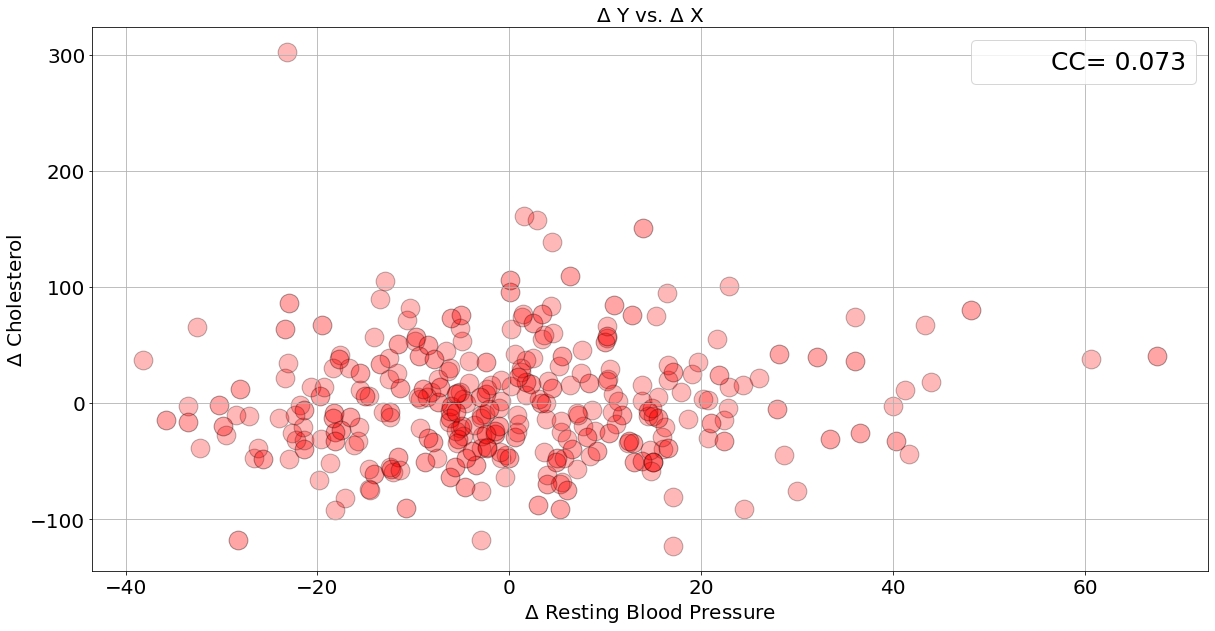

In [127]:
""""
In this cell, I plug in my desired arguments into my function "ResidualVsResidual".
I choose to plug in the patient's Resting Blood Pressure as the x-axis parameter
and their Cholesterol as the y-axis parameter. I use the Age as the trend parameter
as I suspect that any relationship between blood pressure and cholesterol may have
its dependencies on the patient's age. 

In this example, you could see how the CC goes down to ~57% of its original value 
after the trend with age is removed. 

"""

xparameter=np.asarray(table['trestbps']) #The resting blood pressure
yparameter= np.asarray(table['chol']) #The cholesterol
trendparameter= np.asarray(table['age']) #The age

xlabel="Resting Blood Pressure"
ylabel="Cholesterol"
trendlabel="Age"

ResidualVsResidual(xparameter,yparameter,trendparameter,xlabel,ylabel,trendlabel,1)